In [11]:
import psycopg2
from psycopg2 import sql

In [12]:
# DATABASE CONNECTION 
HOST = "localhost"
DATABASE = "audio"
USER = "postgres"
PASSWORD = "postgres"

In [24]:
conn = psycopg2.connect(
    host=HOST,
    database=DATABASE,
    user=USER,
    password=PASSWORD
)

cursor = conn.cursor()

### Retrieve audio data for given id

In [19]:
AUDIO_ID = 3

In [25]:
def handle_complex_column(column):
    if " AS " in column:
        return sql.SQL(column)
    # If no alias is present, wrap the column in a SQL expression
    return sql.SQL("({})").format(sql.SQL(column))

In [26]:
columns = [
    "id",
    "audio_data_id",
    "duration",
    "tempo",
    "encode(raw_audio_plot, 'hex') AS raw_audio_plot",
    "encode(amplitude_plot, 'hex') AS amplitude_plot",
    "encode(spectogram_plot, 'hex') AS spectogram_plot",
    "encode(mel_spectogram_plot, 'hex') AS mel_spectogram_plot",
    "encode(chroma_plot, 'hex') AS chroma_plot"
]

query = sql.SQL("""
    SELECT  {columns}
    FROM    audio_analysed_data
    WHERE   audio_data_id = %s
""").format(columns=sql.SQL(', ').join(map(handle_complex_column, columns)))

cursor.execute(query, (AUDIO_ID, ))

rows = cursor.fetchall()

In [42]:
cursor.close()
conn.close()

In [43]:
import io
from IPython.display import display, Image
import PIL.Image

In [46]:
def display_plot(hex_data, title="Plot"):
    print(f"===== {title} =====")
    decoded_data = bytes.fromhex(hex_data)
    image = PIL.Image.open(io.BytesIO(decoded_data))
    display(image)

Audio duration: 9.627 seconds
Tempo: 129.199 BPM
===== Raw Audio =====


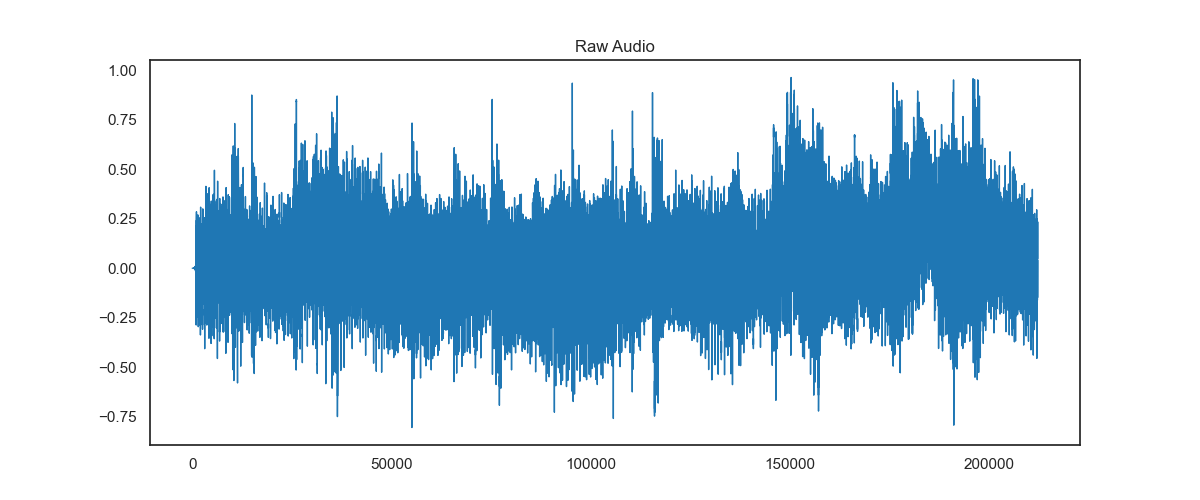

In [47]:
for row in rows:
    id, audio_data_id, duration, tempo, raw_audio_plot, amplitude_plot, spectogram_plot, mel_splectogram_plot, chroma_plot = row
    
    print(f"Audio duration: {duration} seconds")
    print(f"Tempo: {tempo} BPM")

    display_plot(raw_audio_plot, "Raw Audio")
    display_plot(amplitude_plot, "Amplitude")
    display_plot(spectogram_plot, "Spectogram")
    display_plot(mel_splectogram_plot, "Mel Spec")
    display_plot(raw_audio_plot, "Raw Audio")
    
    